## DATA PROCESSES

# CLUSTERING IMPLEMENTATION - A USE CASE

## **Chronic kidney disease (CKD) patients dataset**

We will work with a public and well-known dataset, in which different variables regarding chronic kidney disease (CKD) in different patients are studied. We will divide our study in 4 parts:
1. Data preparation and exploratory data analysis
2. Clustering algorithms implementation and evaluation
3. Validation and visualization

#### Some background about the dataset
What is CKD?
- Chronic kidney disease (CKD), also known as chronic renal disease, involves heterogenous conditions that damage kidney.
- Some of the complications include high blood pressure, anemia (low blood count), weak bones, poor nutritional health and nerve damage.
- Early detection and treatment can often keep chronic kidney disease from getting worse.

The original dataset was obtained over a 2-months period from a hospital in India. Data was collected from patients in a potential early stage of the disease. The attributes studied are CKD indicators, so the interpretation of the obtained models can be very useful.

In its origin, the dataset was thought to be used in the task of classification. Therefore, one of the variables contains the "classification" itself, that is, whether the patient has or has not the disease. Since we are going to work with a clustering analysis problem and not a classification one, we will remove that class (even though we may use it at the end to check how well the clusters we have obtained relate to that classes). 

Importing the needed libraries

In [ ]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_samples, silhouette_score
from kneed import KneeLocator

In case not installed yet, you can install libraries and modules with pip or conda.

```conda install -c conda-forge kneed ```

Visualization configuration

In [ ]:
%matplotlib inline

## 1. Data preparation and exploratory data analysis

Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
ckd_init = pd.read_csv('/content/drive/My Drive/data science/Data Processes/kidney_disease.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's get some information about it... How many patients do we have? (Each row contains one patient information) How many variables are we studying? Of which types are those? Are there NULL fields?

In [ ]:
ckd_init.shape

(400, 26)

In [ ]:
ckd_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
ckd_init.head().T

,0,1,2,3,4
id,0,1,2,3,4
age,48,7,62,48,51
bp,80,50,80,70,80
sg,1.02,1.02,1.01,1.005,1.01
al,1,4,2,4,2
su,0,0,3,0,0
rbc,NaN,NaN,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent


#### Data dictionary
1. **age** - age
2. **bp** - blood pressure
3. **sg** - specific gravity
4. **al** - albumin
5. **su** - sugar
6. **rbc** - red blood cells
7. **pc** - pus cell
8. **pcc** - pus cell clumps
9. **ba** - bacteria
10. **bgr** - blood glucose random
11. **bu** - blood urea
12. **sc** - serum creatinine
13. **sod** - sodium
14. **pot** - potassium
15. **hemo** - hemoglobin
16. **pcv** - packed cell volume
17. **wc** - white blood cell count
18. **rc** - red blood cell count
19. **htn** - hypertension
20. **dm** - diabetes mellitus
21. **cad** - coronary artery disease
22. **appet** - appetite
23. **pe** - pedal edema
24. **ane** - anemia
25. **classification** - class

#### Features description
1. Age(numerical) --> age in years
2. Blood Pressure(numerical) bp in mm/Hg
3. Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
4. Albumin(nominal)al - (0,1,2,3,4,5)
5. Sugar(nominal) su - (0,1,2,3,4,5)
6. Red Blood Cells(nominal) rbc - (normal,abnormal)
7. Pus Cell (nominal)pc - (normal,abnormal)
8. Pus Cell clumps(nominal)pcc - (present,notpresent)
9. Bacteria(nominal) ba - (present,notpresent)
10. Blood Glucose Random(numerical) bgr in mgs/dl
11. Blood Urea(numerical) bu in mgs/dl
12. Serum Creatinine(numerical) sc in mgs/dl
13. Sodium(numerical) sod in mEq/L
14. Potassium(numerical) pot in mEq/L
15. Haemoglobin(numerical) hemo in gms
16. Packed Cell Volume(numerical)
17. White Blood Cell Count(numerical) wc in cells/cumm
18. Red Blood Cell Count(numerical) rc in millions/cmm
19. Hypertension(nominal) htn - (yes,no)
20. Diabetes Mellitus(nominal) dm - (yes,no)
21. Coronary Artery Disease(nominal) cad - (yes,no)
22. Appetite(nominal) ppet - (good,poor)
23. Pedal Edema(nominal) pe - (yes,no)
24. Anemia(nominal)ane - (yes,no)
25. Class (nominal) class - (ckd,notckd)

Rename the columns to have meaningful names and check dtypes

In [ ]:
cols_names = {"bp":"blood_pressure",
              "sg":"specific_gravity",
              "al":"albumin",
              "su":"sugar",
              "rbc":"red_blood_cells",
              "pc":"pus_cell",
              "pcc":"pus_cell_clumps",
              "ba":"bacteria",
              "bgr":"blood_glucose_random",
              "bu":"blood_urea",
              "sc":"serum_creatinine",
              "sod":"sodium",
              "pot":"potassium",
              "hemo":"haemoglobin",
              "pcv":"packed_cell_volume",
              "wc":"white_blood_cell_count",
              "rc":"red_blood_cell_count",
              "htn":"hypertension",
              "dm":"diabetes_mellitus",
              "cad":"coronary_artery_disease",
              "appet":"appetite",
              "pe":"pedal_edema",
              "ane":"anemia"}

ckd_processed = ckd_init.rename(columns = cols_names)

We change red_blod_cell_count, packed_cell_volume and white_blood_cell_count to numerical dtype. (Some fields are filled with '?' instead of NaN, therfore, we use errors='coerce')

In [ ]:
ckd_processed['red_blood_cell_count'] = pd.to_numeric(ckd_processed['red_blood_cell_count'], errors='coerce')
ckd_processed['packed_cell_volume'] = pd.to_numeric(ckd_processed['packed_cell_volume'], errors='coerce')
ckd_processed['white_blood_cell_count'] = pd.to_numeric(ckd_processed['white_blood_cell_count'], errors='coerce')

We drop ID column. (We will still leave "classification" column for some issues, but we will drop it before performing clustering.)

In [ ]:
ckd_processed.drop(["id"],axis=1,inplace=True) 

Check for unique values of features

In [ ]:
for i in ckd_processed.columns:
    print(f'{i} : {ckd_processed[i].nunique()} values')

age : 76 values
blood_pressure : 10 values
specific_gravity : 5 values
albumin : 6 values
sugar : 6 values
red_blood_cells : 2 values
pus_cell : 2 values
pus_cell_clumps : 2 values
bacteria : 2 values
blood_glucose_random : 146 values
blood_urea : 118 values
serum_creatinine : 84 values
sodium : 34 values
potassium : 40 values
haemoglobin : 115 values
packed_cell_volume : 42 values
white_blood_cell_count : 89 values
red_blood_cell_count : 45 values
hypertension : 2 values
diabetes_mellitus : 5 values
coronary_artery_disease : 3 values
appetite : 2 values
pedal_edema : 2 values
anemia : 2 values
classification : 3 values


Numerical vs categorical variables

In [ ]:
numerical_features = []
categorical_features = []

for i in ckd_processed.columns:
    if ckd_processed[i].dtype == 'object':
        categorical_features.append(i)
    else:
        numerical_features.append(i)

print('Numerical features: ', numerical_features)
print('\nCategorical features: ', categorical_features)

Numerical features:  ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

Categorical features:  ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']


Check unique values in categorical features

In [ ]:
for feats in categorical_features:
    print(f'{feats} --> {ckd_processed[feats].unique()}')

red_blood_cells --> [nan 'normal' 'abnormal']
pus_cell --> ['normal' 'abnormal' nan]
pus_cell_clumps --> ['notpresent' 'present' nan]
bacteria --> ['notpresent' 'present' nan]
hypertension --> ['yes' 'no' nan]
diabetes_mellitus --> ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease --> ['no' 'yes' '\tno' nan]
appetite --> ['good' 'poor' nan]
pedal_edema --> ['no' 'yes' nan]
anemia --> ['no' 'yes' nan]
classification --> ['ckd' 'ckd\t' 'notckd']


Correct the errors in "diabetes_mellitus", "coronary_artery_disease" and "classification"

In [ ]:
ckd_processed['diabetes_mellitus'].replace(to_replace = {'\tno':'no',
                                                         '\tyes':'yes',
                                                         ' yes':'yes'}, 
                                           inplace = True)

ckd_processed['coronary_artery_disease'].replace(to_replace = '\tno', 
                                                 value='no', 
                                                 inplace = True)

ckd_processed['classification'].replace(to_replace = 'ckd\t', 
                                        value = 'ckd',
                                        inplace = True)

In [ ]:
for feats in categorical_features:
    print(f'{feats} --> {ckd_processed[feats].unique()}')

red_blood_cells --> [nan 'normal' 'abnormal']
pus_cell --> ['normal' 'abnormal' nan]
pus_cell_clumps --> ['notpresent' 'present' nan]
bacteria --> ['notpresent' 'present' nan]
hypertension --> ['yes' 'no' nan]
diabetes_mellitus --> ['yes' 'no' nan]
coronary_artery_disease --> ['no' 'yes' nan]
appetite --> ['good' 'poor' nan]
pedal_edema --> ['no' 'yes' nan]
anemia --> ['no' 'yes' nan]
classification --> ['ckd' 'notckd']


Check missing values

In [ ]:
ckd_processed.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
anemia                       1
appetite                     1
pedal_edema                  1
classification               0
dtype: int64

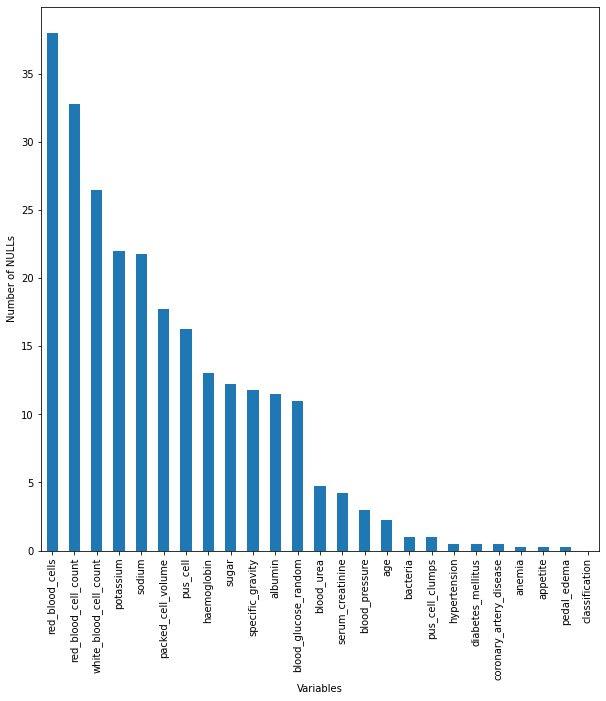

In [ ]:
((ckd_processed.isnull().sum()/ckd_processed.shape[0])*100).sort_values(ascending=False).plot(kind='bar', figsize=(10,10))
plt.xlabel('Variables')
plt.ylabel('Number of NULLs')
plt.show()

Deal with missing data: simple approach... replace numerical null values with mean and categorical null values with mode.

Other more sophisticated methods: https://scikit-learn.org/stable/modules/impute.html#impute

In [ ]:
for num in numerical_features:
    ckd_processed[num].fillna(ckd_processed[num].mean(), inplace=True)
    
for cat in categorical_features:
    ckd_processed[cat].fillna(ckd_processed[cat].mode()[0], inplace=True)

In [ ]:
ckd_processed.isnull().sum().sort_values(ascending=False)

classification             0
serum_creatinine           0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
sodium                     0
anemia                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
age                        0
dtype: int64

**Exploratory data analysis**: univariate analysis

#### Features distribution
- Numerical features

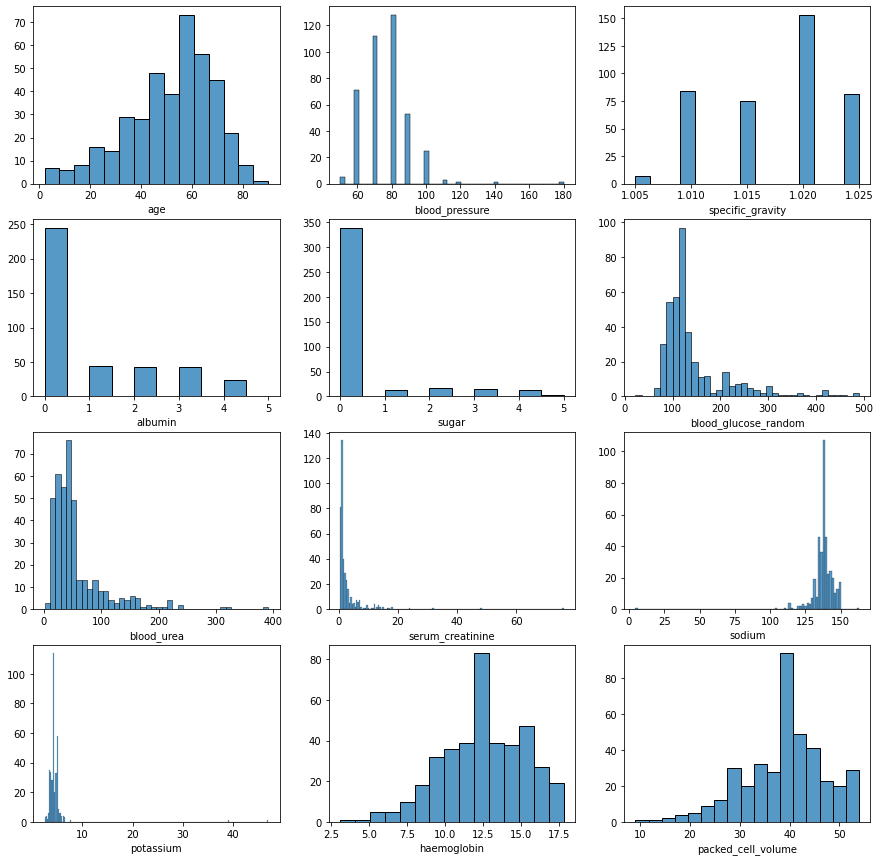

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))

for ax, feat in zip(axes.flatten(), numerical_features):
    sns.histplot(ckd_processed, x=feat, ax=ax)
    ax.set(ylabel = '')

- Categorical features

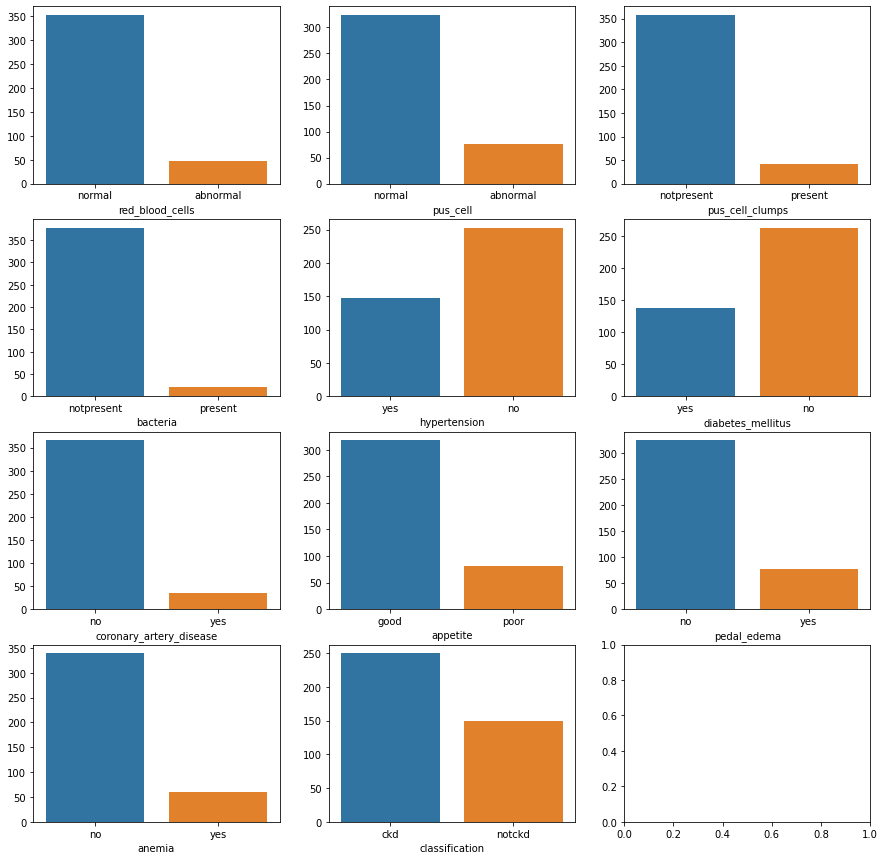

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))

for ax, feat in zip(axes.flatten(), categorical_features):
    sns.countplot(data=ckd_processed, x=feat, ax=ax)
    ax.set(ylabel = '')

Percentage of patients with/without the disease

In [ ]:
print('Percent of CKD: ',
      round(len(ckd_processed[ckd_processed['classification']=='ckd'])/len(ckd_processed['classification'])*100,2),
      "%")
print('Percent of not-CKD: ',
      round(len(ckd_processed[ckd_processed['classification']=='notckd'])/len(ckd_processed['classification'])*100,2),
      "%")

Percent of CKD:  62.5 %
Percent of not-CKD:  37.5 %


Drop the label: the column "classification"

In [ ]:
ckd_processed_allnum = ckd_processed.drop(["classification"],axis=1) 
categorical_features.remove('classification')

Tranforming categorical data to numeric

In [ ]:
ckd_processed_allnum = pd.get_dummies(ckd_processed_allnum, 
                                      columns=categorical_features)

In [ ]:
ckd_processed_allnum

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,red_blood_cells_abnormal,red_blood_cells_normal,pus_cell_abnormal,pus_cell_normal,pus_cell_clumps_notpresent,pus_cell_clumps_present,bacteria_notpresent,bacteria_present,hypertension_no,hypertension_yes,diabetes_mellitus_no,diabetes_mellitus_yes,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


**Standarization of the data**

Data sets usually contain numerical features that have been measured in different units, such as height (in inches) and weight (in pounds). A machine learning algorithm would consider weight more important than height only because the values for weight are larger and have higher variability from person to person.

Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.

There are several approaches to implementing feature scaling. A great way to determine which technique is appropriate for your dataset is to read scikit-learn’s preprocessing documentation.

In this example, you’ll use the StandardScaler class. This class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1.

We take a look at the new statistics.

In [ ]:
ckd_standarized = pd.DataFrame(StandardScaler().fit_transform(ckd_processed_allnum), 
                               columns = ckd_processed_allnum.columns)
ckd_standarized.describe().round(2)

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,red_blood_cells_abnormal,red_blood_cells_normal,pus_cell_abnormal,pus_cell_normal,pus_cell_clumps_notpresent,pus_cell_clumps_present,bacteria_notpresent,bacteria_present,hypertension_no,hypertension_yes,diabetes_mellitus_no,diabetes_mellitus_yes,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.92,-1.97,-2.31,-0.80,-0.44,-1.69,-1.14,-0.48,-14.47,-0.76,-3.47,-3.67,-2.46,-3.11,-0.36,-2.74,-0.48,-2.06,-2.92,-0.34,-4.15,-0.24,-1.31,-0.76,-1.39,-0.72,-3.28,-0.30,-1.97,-0.51,-2.06,-0.48,-2.38,-0.42
25%,-0.56,-0.48,-0.45,-0.80,-0.44,-0.63,-0.62,-0.39,-0.28,-0.22,-0.61,-0.60,-0.57,-0.25,-0.36,0.36,-0.48,0.48,0.34,-0.34,0.24,-0.24,-1.31,-0.76,-1.39,-0.72,0.30,-0.30,0.51,-0.51,0.48,-0.48,0.42,-0.42
50%,0.15,0.13,-0.00,-0.01,-0.44,-0.30,-0.27,-0.30,0.00,0.00,0.00,0.00,0.00,0.00,-0.36,0.36,-0.48,0.48,0.34,-0.34,0.24,-0.24,0.76,-0.76,0.72,-0.72,0.30,-0.30,0.51,-0.51,0.48,-0.48,0.42,-0.42
75%,0.74,0.26,0.48,0.77,-0.00,0.03,0.09,-0.00,0.38,0.06,0.77,0.63,0.39,0.47,-0.36,0.36,-0.48,0.48,0.34,-0.34,0.24,-0.24,0.76,1.31,0.72,1.39,0.30,-0.30,0.51,-0.51,0.48,-0.48,0.42,-0.42
max,2.27,7.69,1.42,3.13,4.43,4.58,6.78,13.00,2.77,15.05,1.94,1.86,7.14,3.92,2.74,0.36,2.06,0.48,0.34,2.92,0.24,4.15,0.76,1.31,0.72,1.39,0.30,3.28,0.51,1.97,0.48,2.06,0.42,2.38


## 2. Clustering algorithms implementation and evaluation

### - KMeans

Now the data are ready to be clustered. The KMeans estimator class in scikit-learn is where you set the algorithm parameters before fitting the estimator to the data. The scikit-learn implementation is flexible, providing several parameters that can be tuned.

Some of the parameters that KMeans uses:

- ***init*** controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.

- ***n_clusters*** sets k for the clustering step. This is the most important parameter for k-means.

- ***n_init*** sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

- ***max_iter*** sets the number of maximum iterations for each initialization of the k-means algorithm.

Instantiate the KMeans class with the default arguments. 

In [ ]:
kmeans = KMeans()
kmeans.fit(ckd_standarized)
print(ckd_standarized.head(5))

        age  blood_pressure  ...  anemia_no  anemia_yes
0 -0.205464        0.262338  ...   0.420084   -0.420084
1 -2.623810       -1.966580  ...   0.420084   -0.420084
2  0.620313        0.262338  ...  -2.380476    2.380476
3 -0.205464       -0.480635  ...  -2.380476    2.380476
4 -0.028511        0.262338  ...   0.420084   -0.420084

[5 rows x 34 columns]


Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit().

In [ ]:
# The lowest SSE value
print(kmeans.inertia_)

7537.515159881682


In [ ]:
# Final locations of the centroid
print(kmeans.cluster_centers_)

[[-3.43158176e-01 -3.87456033e-01  8.19716309e-01 -6.86243566e-01
  -3.55425360e-01 -4.79509869e-01 -4.73984903e-01 -3.70506698e-01
   4.24612489e-01 -8.71724795e-02  9.14948191e-01  8.62014995e-01
  -2.33831177e-01  7.18937398e-01 -3.64889676e-01  3.64889676e-01
  -4.84322105e-01  4.84322105e-01  3.42517789e-01 -3.42517789e-01
   2.41248955e-01 -2.41248955e-01  7.62251709e-01 -7.62251709e-01
   7.08147374e-01 -7.08147374e-01  3.04788738e-01 -3.04788738e-01
   5.07800783e-01 -5.07800783e-01  4.67876533e-01 -4.67876533e-01
   4.20084025e-01 -4.20084025e-01]
 [ 4.65378782e-01  1.89105881e-01 -4.67468785e-01  3.17036501e-01
   4.47321148e-01  5.67963216e-01  1.79583409e-02 -6.97034159e-02
  -1.67869660e-01 -8.71845298e-02 -3.04064923e-01 -2.94195146e-01
   4.18630406e-01 -3.64321596e-01 -3.64889676e-01  3.64889676e-01
  -3.71179452e-02  3.71179452e-02 -8.58440574e-04  8.58440574e-04
   2.41248955e-01 -2.41248955e-01 -1.12995924e+00  1.12995924e+00
  -1.27462592e+00  1.27462592e+00  3.0478

In [ ]:
 # The number of iterations required to converge
print(kmeans.n_iter_)

9


**Choosing the Appropriate Number of Clusters**
In this section, you’ll look at two methods that are commonly used to evaluate the appropriate number of clusters:
- The elbow method
- The silhouette coefficient

These are often used as complementary evaluation techniques rather than one being preferred over the other. To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE.

In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(ckd_standarized)
    sse.append(kmeans.inertia_)

When you plot SSE as a function of the number of clusters, notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.

There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. In this example, the elbow is located at x=3.

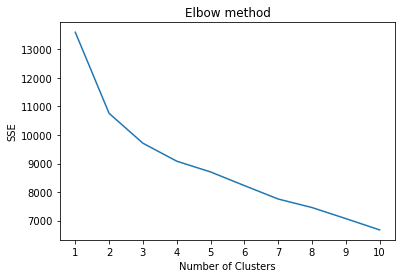

In [ ]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(range(1, 11), 
                 sse, 
                 curve="convex", 
                 direction="decreasing")
kl.elbow

3

Silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

1. How close the data point is to other points in the cluster
2. How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

Loop through values of k again. This time, instead of computing SSE, compute the silhouette coefficient.

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(ckd_standarized)
    score = silhouette_score(ckd_standarized, kmeans.labels_)
    silhouette_coefficients.append(score)

Plotting the average silhouette scores for each k shows that different options for the number of clusters. The results do not say the same thing as the elbow method did.

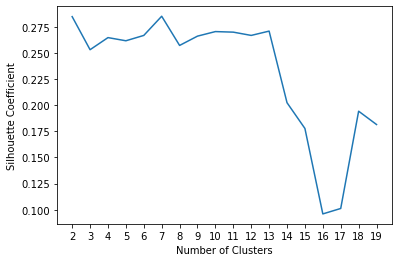

In [ ]:
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Looking to the different values of silhouette for each sample in the dataset setting different numbers of clusters.

In [ ]:
def silhouette_analysis(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10  

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("PCA component 1")
        ax2.set_ylabel("PCA component 2")

        plt.suptitle(("\nSilhouette analysis for KMeans clustering "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

Performing a PCA to plot the clusters in a two-dimensional space

In [ ]:
pca=PCA(n_components=2)
ckd_pca=pd.DataFrame(pca.fit_transform(ckd_standarized))

For n_clusters = 2 The average silhouette_score is : 0.2846508148328204
For n_clusters = 3 The average silhouette_score is : 0.25302089191274235
For n_clusters = 4 The average silhouette_score is : 0.2629390829912659
For n_clusters = 5 The average silhouette_score is : 0.2615640799541589
For n_clusters = 6 The average silhouette_score is : 0.2643839451001859
For n_clusters = 7 The average silhouette_score is : 0.2684855486732028
For n_clusters = 8 The average silhouette_score is : 0.2509486426274183


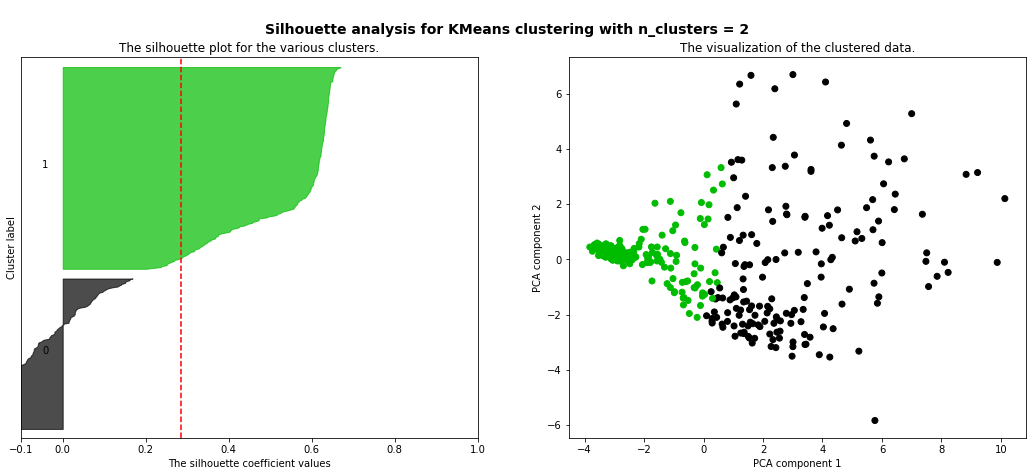

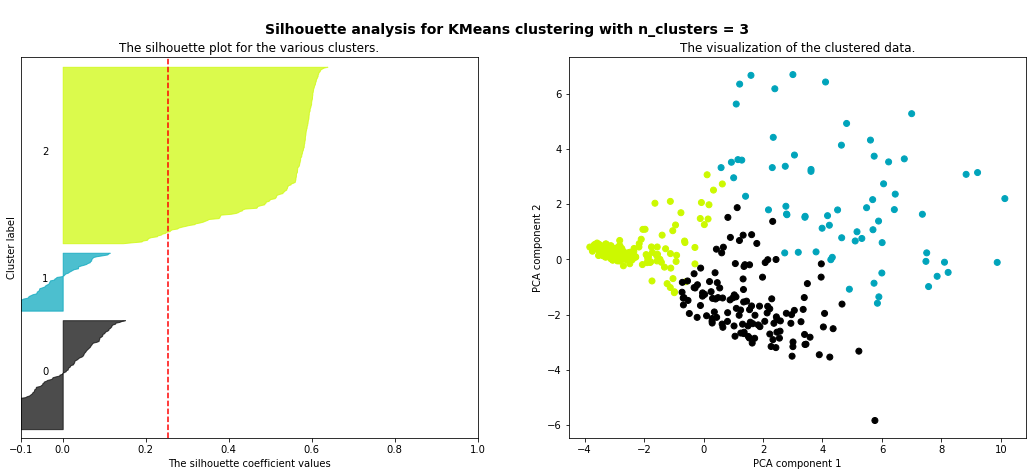

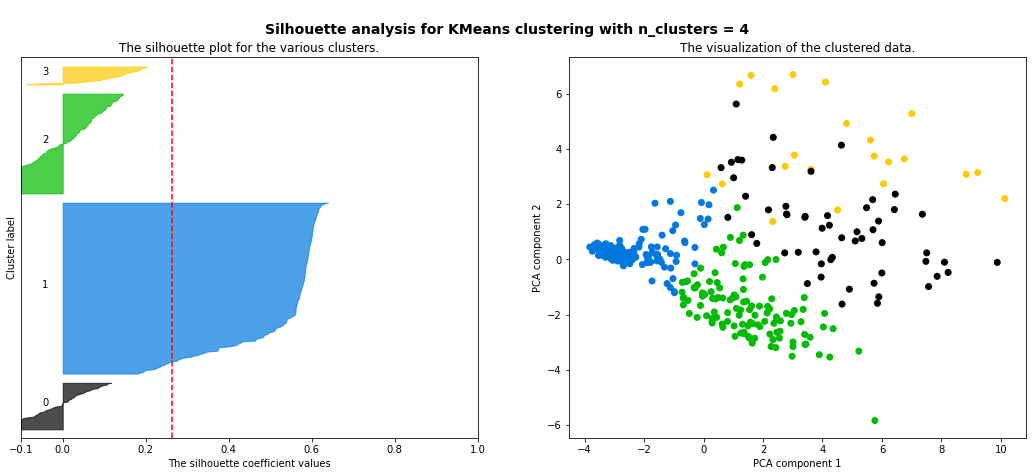

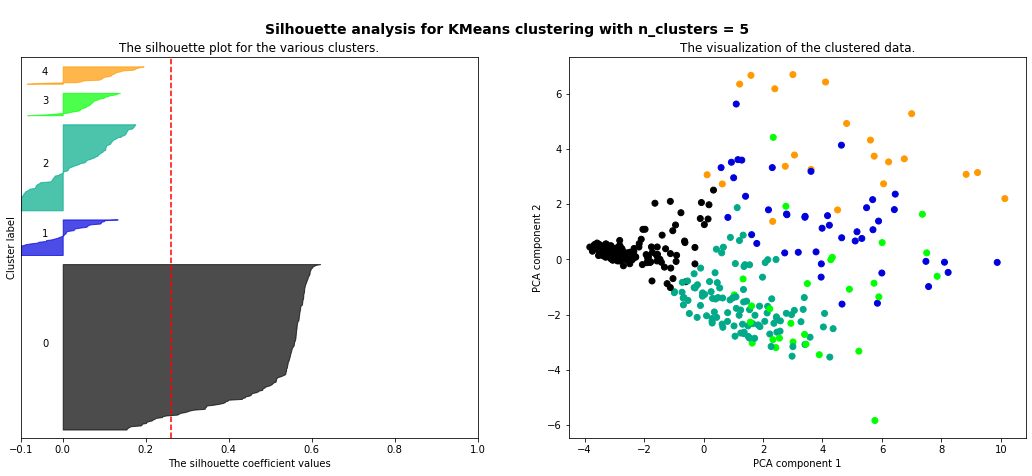

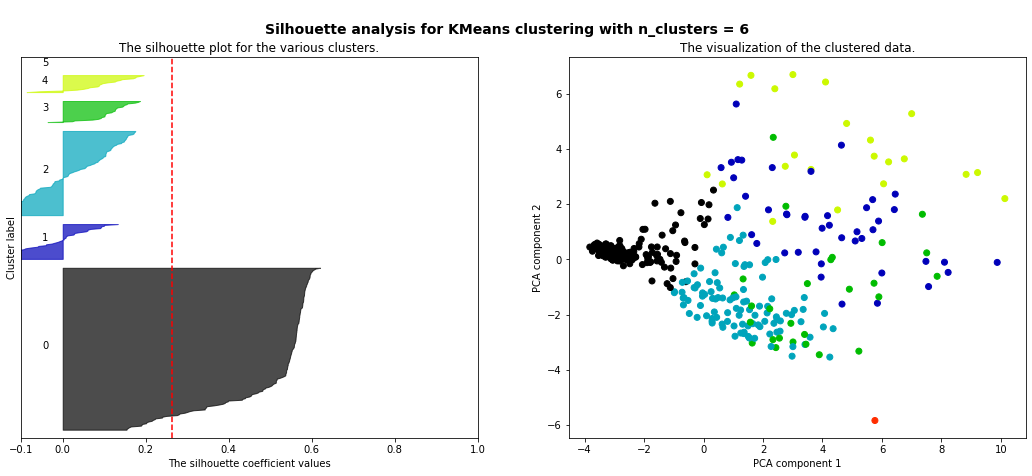

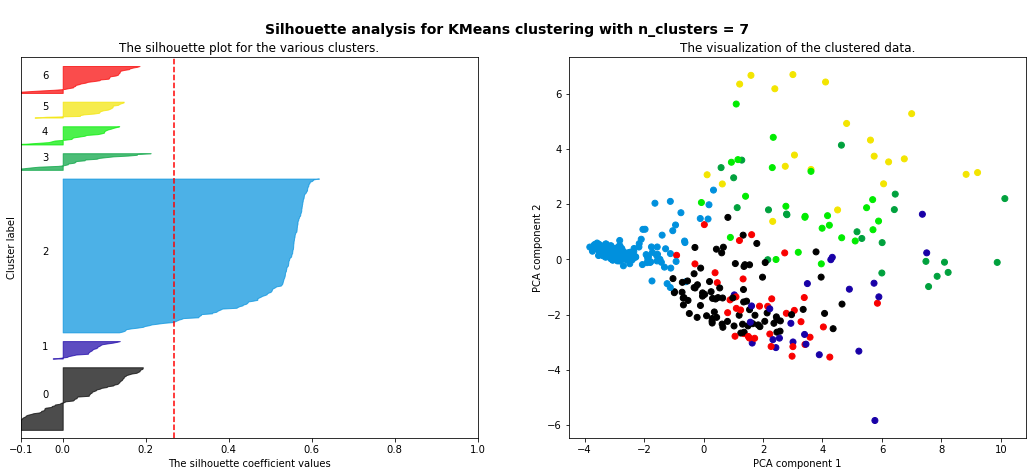

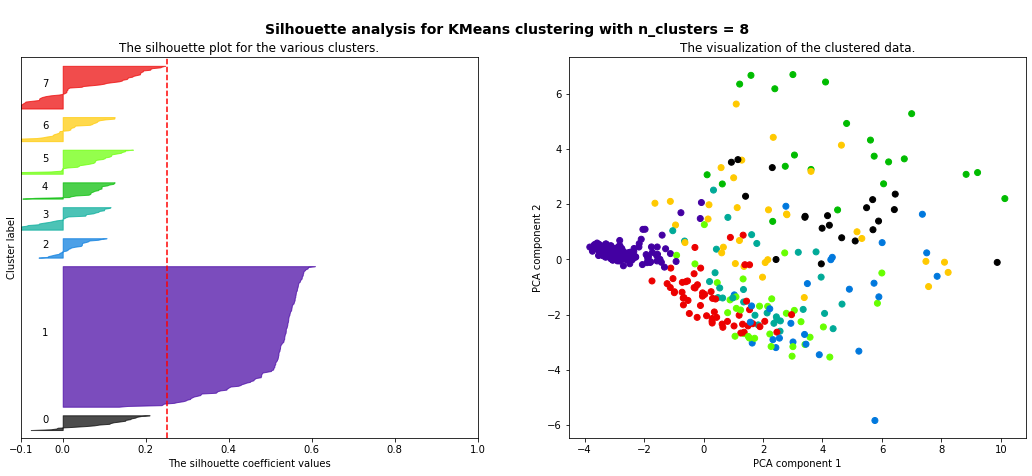

In [ ]:
silhouette_analysis(np.array(ckd_standarized), 
                    ckd_pca, 
                    [2, 3, 4, 5, 6, 7, 8])

Although the average silhouette is not the highest, we may say that the model obteined setting k=3, could be providing us more information.

### - Hierarchical agglomerative clustering

We will use some functions provided in the package **scipy**, since it allows us plotting dendograms in a more automatized way that sckit-learn does.

Try to build the linkage matrix with different methods ('single', 'complete', 'ward', 'centroid'...) and distance metrics ('euclidean', 'minkowski', 'cosine'...)

In [ ]:
distances_linkage = linkage(ckd_standarized,
                            method = 'ward', 
                            metric = 'euclidean'
                           )

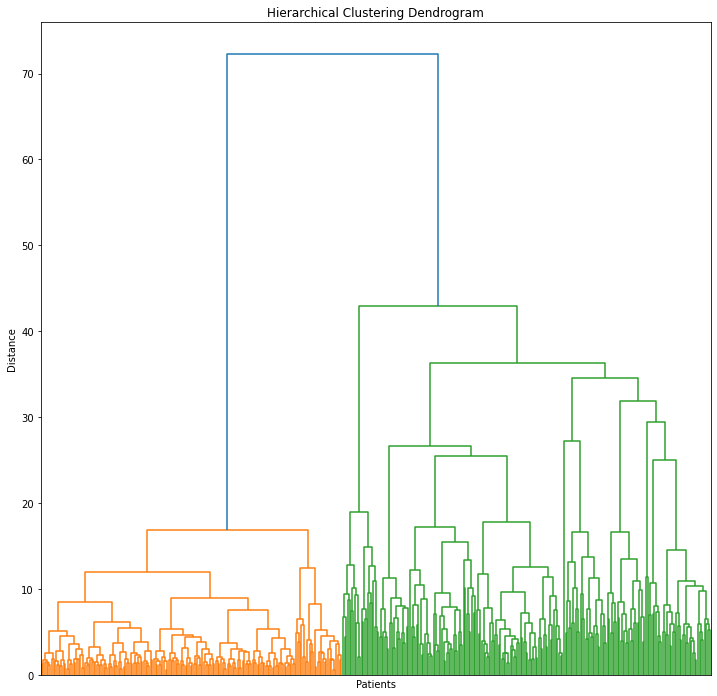

In [ ]:
plt.figure(figsize=(12, 12))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Distance')

dendrogram(
    distances_linkage,
    #color_threshold = 0,
    no_labels = True
)

plt.show()

The function dendrogram provide some nice options. We can for example collide some partes of the tree when there are too many leaves (*truncate_mode* and *lastp*) and mark those branches (*show_contracted*).

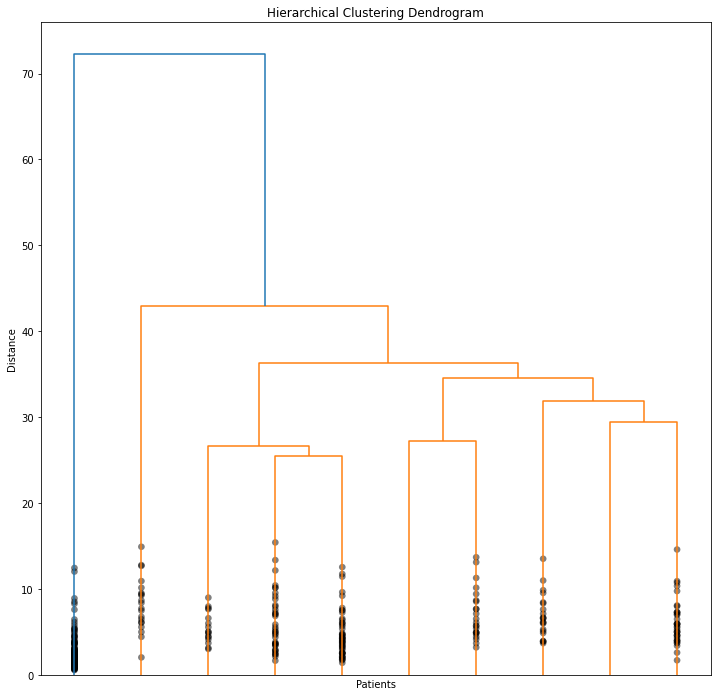

In [ ]:
plt.figure(figsize=(12, 12))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Distance')

dendrogram(
    distances_linkage,
    truncate_mode='lastp',
    p=10,
    show_leaf_counts=False,
    show_contracted=True,
    #color_threshold = 0,
    no_labels = True
)

plt.show()

Representing the results in the two components of the PCA.

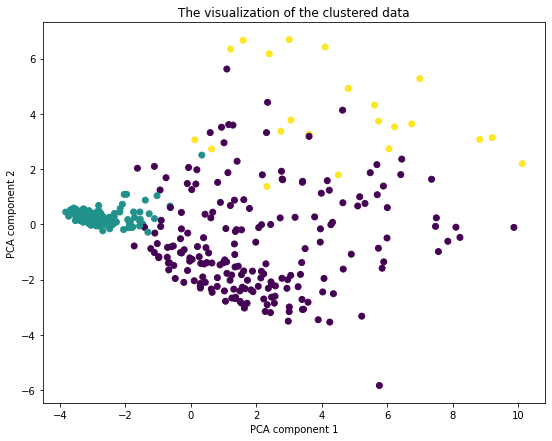

In [ ]:
hcluster = AgglomerativeClustering(n_clusters = 3,
                                   affinity = 'euclidean',
                                   linkage = 'ward')
hcluster.fit_predict(ckd_standarized)

plt.figure(figsize=(9, 7))


plt.scatter(ckd_pca[0], 
            ckd_pca[1],
            c=hcluster.labels_
           )

plt.title("The visualization of the clustered data")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
    
plt.show()

## 3. Validation and visualization

Get the KMeans with k = 3 model...

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(ckd_standarized)
ckd_processed['cluster'] = kmeans.labels_.astype(str)

Plot the number of instances in each cluster... Do all the patients in the clusters correspond to the CKD classification?

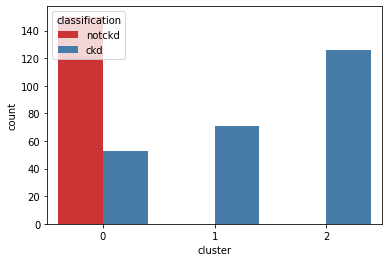

In [ ]:
sns.countplot(data=ckd_processed.sort_values(by='cluster'), 
              x='cluster', 
              hue='classification',
              palette='Set1')

In [ ]:
sns.pairplot(ckd_processed, 
             hue = 'cluster',
             palette='Set1')

Output hidden; open in https://colab.research.google.com to view.

Visualizing each variable

- Age

In [ ]:
sns.boxplot(data=ckd_processed,
                x='age', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Blood pressure

In [ ]:
sns.boxplot(data=ckd_processed, 
                x='blood_pressure', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Specific gravity

In [ ]:
sns.stripplot(data=ckd_processed,
                x='specific_gravity', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Albumin

In [ ]:
sns.stripplot(data=ckd_processed,
                x='albumin', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Sugar

In [ ]:
sns.stripplot(data=ckd_processed,
                x='sugar', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Red blood cells

In [ ]:
sns.swarmplot(data=ckd_processed,
                x='red_blood_cells', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Pus cell

In [ ]:
sns.swarmplot(data=ckd_processed,
                x='pus_cell', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Pus cell clumps

In [ ]:
sns.swarmplot(data=ckd_processed,
                x='pus_cell_clumps', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Bacteria

In [ ]:
sns.swarmplot(data=ckd_processed,
                x='bacteria', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Blood glucose random

In [ ]:
sns.stripplot(data=ckd_processed,
                x='blood_glucose_random', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Blood urea

In [ ]:
sns.stripplot(data=ckd_processed,
                x='blood_urea', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Serum creatinine

In [ ]:
sns.stripplot(data=ckd_processed,
                x='serum_creatinine', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Sodium

In [ ]:
sns.stripplot(data=ckd_processed,
                x='sodium', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Potassium

In [ ]:
sns.stripplot(data=ckd_processed,
                x='potassium', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Haemogoblin

In [ ]:
sns.boxplot(data=ckd_processed,
                x='haemoglobin', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Packed cell volume

In [ ]:
sns.boxplot(data=ckd_processed,
                x='packed_cell_volume', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- White blood cell count

In [ ]:
sns.boxplot(data=ckd_processed,
                x='white_blood_cell_count', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Red blood cell count

In [ ]:
sns.boxplot(data=ckd_processed,
                x='red_blood_cell_count', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Hypertension

In [ ]:
sns.swarmplot(data=ckd_processed,
                x='hypertension', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Diabetes mellitus

In [ ]:
sns.swarmplot(data=ckd_processed,
                x='diabetes_mellitus', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Coronary artery disease

In [ ]:
sns.swarmplot(data=ckd_processed,
                x='coronary_artery_disease', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Appetite

In [ ]:
sns.swarmplot(data=ckd_processed,
                x='appetite', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Pedal edema

In [ ]:
sns.swarmplot(data=ckd_processed,
                x='pedal_edema', 
                y='classification', 
                hue='cluster', 
                palette='Set1')

- Anemia

In [ ]:
sns.swarmplot(data=ckd_processed,
                x='anemia', 
                y='classification', 
                hue='cluster', 
                palette='Set1')